# DataLab Cup 3: Reverse Image Caption

Team name: 窩不知道誒

Team Members: 112501533 黃思誠 112065527 劉承瑋

#### 1. Pick 5 descriptions from testing data and generate 5 images with different noise z for each image respectively

#### Caption from testing data

1. this flower is trumpet shaped with a light pink petal and green sepal
2. this flower has a few bright pink petals that turn more white in the center
3. this flower is white in color with petals that are wavy and uneven
4. the flower is red in color with a long pedicel with leaves on it
5. this flower has a brown center surrounded by layers of long yellow petals with rounded tips

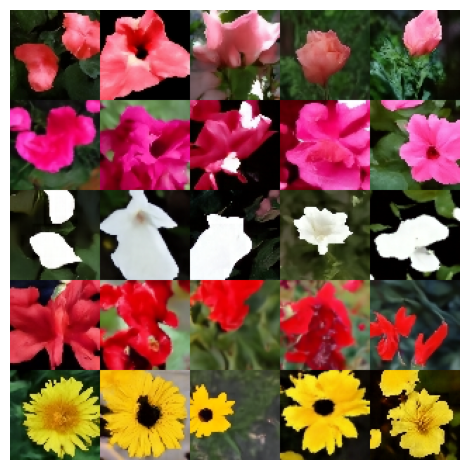

#### 2. Models you tried during competition

我們這次選擇使用 Diffusion model 作為我們這次 Competition 的模型。

- Diffusion model 的主要部分可以視為就是一個預測 Noise 的模型，其會接受 Noisy image, noise power, text embedding 並預測或說生成 Noise。再將輸入的 Noisy image 通過這個 Noise 進行 Denoise 即可產生圖片。最終目的就是給定一個 Noise 並生成圖片。

- 而在 Text embedding 及 noisy image 的結合上，我們選擇使用 Spatial transformer 來將不同 Shape 的輸入結合。

- 選擇 Diffusion model 的理由有很大一部分就是因為它很有名，近期各類主流的 Image generative ai 都是 diffusion model。除此之外，相比起 GAN，我們認為其訓練的概念更接近一般的 Neural network，因此或許會比較熟悉一點。

#### 3. List the experiment you did

1. Data augmentation

    - 由於[這篇](https://keras.io/examples/generative/gan_ada/#invertible-data-augmentation)所提到的 Leaky augmentation，也就是太多 Augmentation 導致生成出了帶有 Augmentation 的圖片的問題。因此我們只進行了少量的實驗。
    
    - 最終選擇只進行水平、垂直翻轉加上隨機旋轉，並設定在一個較低的機率。

2. Prediction type

    - 一般 Diffusion model 是預測 Noise 作為目標，並在後續進行 Denoise。不過其實也能預測 Image 或是一個稱為 Diffusion velocity 的參數作為目標。

    - 在使用 Cosine schedule 的情況下，predict Image、noise、velocity 可以簡單的通過公式轉換。

    - 在同一組設定下，我們分別針對三種類型去進行訓練，最終我們發現預測 Velocity 的表現最好，而我們認為這是因為它讓 Image loss 及 Noise loss 較為平衡，不會出現一邊特別好的情況。

3. Optimizer

    - Lion 是一個今年新提出的 Optimizer，[論文](https://arxiv.org/abs/2302.06675)中的表現皆優於 AdamW。
    
    - 在我們的實驗下，其表現也確實會比 AdamW 好一點，因此我們最後是用 Lion 作為我們的 Optimizer。 
    
4. Text embedding input

    - 最一開始我們並不是使用 Spatial transformer 作為結合 Text embedding 的方式。我們嘗試過 Pooling、Dense layer、單純的 Attention 及一些較為簡單的方式。最後才找到 Spatial transformer 這個方式。

    - 不過由於 Spatial transformer 中的 Multi-head attention 實在是太吃記憶體了，因此我們只有在圖片降到 16x16 之後才能使用。

5. Classifier-free guidence

    - CFG 是使模型能夠更好的根據所需的條件生成圖片，也就是更好的去根據 Caption 來生成圖片。

    - 主要實作就是在訓練時根據一定機率給定空的 Caption，並在生成圖片時同時給一般的及空的 Caption 分別生成後再根據一定比例去做內插。

    - 不過經過我們的實驗發現，確實加上 CFG 會對分數上的表現帶來巨大的提昇。不過如果只在生成圖片時去做內插，而不在訓練時給予空的 Caption 反而會使分數上的表現更好。這部份我們也不知道具體的原因到底是怎麼回事。不過最終決定就只在生成圖片去做內插而不調整 Training step。 

6. Learning rate schedule

    - 我們的對 Learning rate 進行了兩段的 Schedule，分別是 Warm up 及 Exponential staircase decay。

    - Warm up 是為了避免一開始髓機的 Weight 在較大的 Learning rate 下產生太多擾動。

    - Exponential staircase decay 則是讓 Learning rate 隨訓練降低，以配合 loss 後續較為平緩的變化。

    

#### 4. Anything worth mentioning

#### Learning rate curve

- 20 epochs
- 50 batch size
- 0.15 warm up ratio

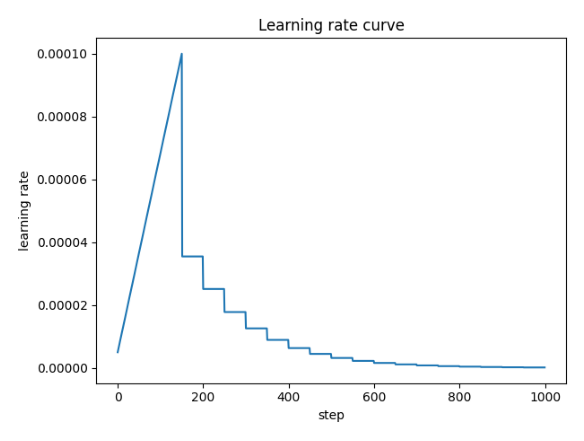

#### Cosine scheduler

可以看到一開始 Noise rate = 0 代表圖片是完全清晰的，而最後 Noise rate = 1 代表圖片完全是雜訊。

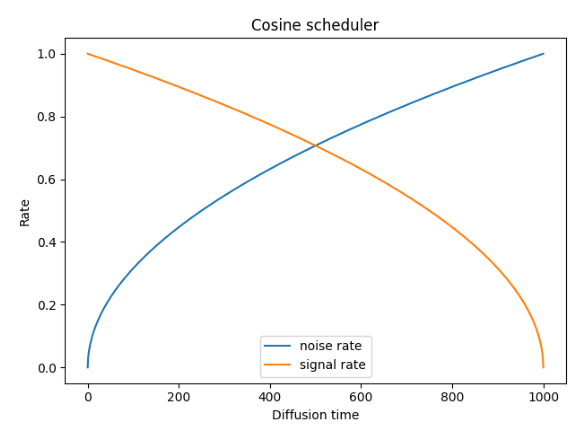

#### Diffusion process

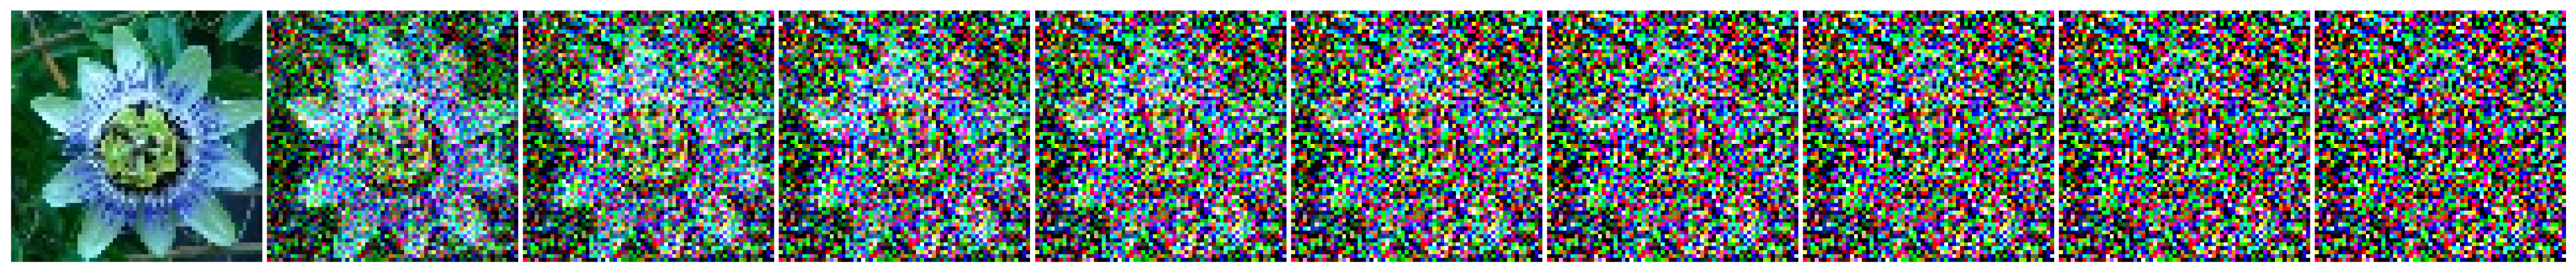